<a href="https://colab.research.google.com/github/Rush1120/ros/blob/main/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

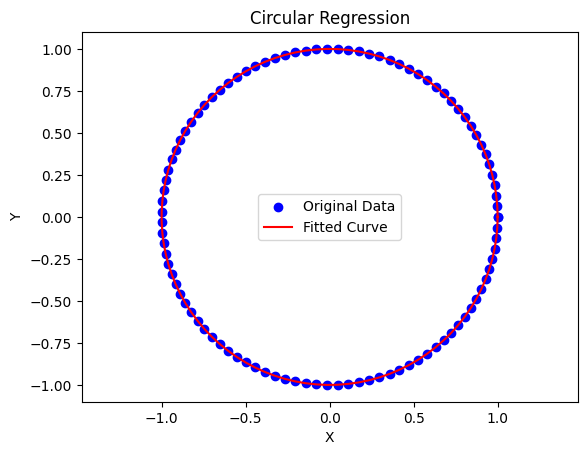

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

num_points = 100
angles = np.linspace(0, 2*np.pi, num_points)

x = np.cos(angles)
y = np.sin(angles)

def circular_function(theta, a, b, c, d):
    return a * np.cos(b * theta + c) + d

popt, _ = curve_fit(circular_function, angles, x)
a, b, c, d = popt

predicted_x = circular_function(angles, a, b, c, d)
predicted_y = circular_function(angles + np.pi/2, a, b, c, d)

plt.figure()
plt.scatter(x, y, label='Original Data', color='blue')
plt.plot(predicted_x, predicted_y, label='Fitted Curve', color='red')
plt.title('Circular Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.show()


In [2]:
import numpy as np
mean = np.zeros(5)
cov_matrix = np.eye(5)
num_samples = 1000
data = np.random.multivariate_normal(mean, cov_matrix, num_samples)
print("Generated 5-dimensional data:")
print(data[:5])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
print("\nShape of 2-dimensional data after PCA:")
print(data_2d.shape)
print("\nReduced 2-dimensional data:")
print(data_2d[:5])


Generated 5-dimensional data:
[[-0.60660521  0.99564093  0.88508248 -0.44757475  0.57514498]
 [-0.66892323  1.82702299  0.03916187  1.71999721  1.14661971]
 [ 1.25576874 -1.31058754  0.08873416 -1.10526963 -0.08312587]
 [ 0.14458115  1.39519371  0.7993541  -0.76914576 -0.75047027]
 [ 0.07885415 -2.05662339 -0.65619932 -0.24743439  1.99423054]]

Shape of 2-dimensional data after PCA:
(1000, 2)

Reduced 2-dimensional data:
[[-0.5297098  -0.46805634]
 [ 0.2969893  -2.21256669]
 [-1.09052398  1.3391752 ]
 [-0.06961678  0.92534265]
 [-1.19336574 -1.10869646]]


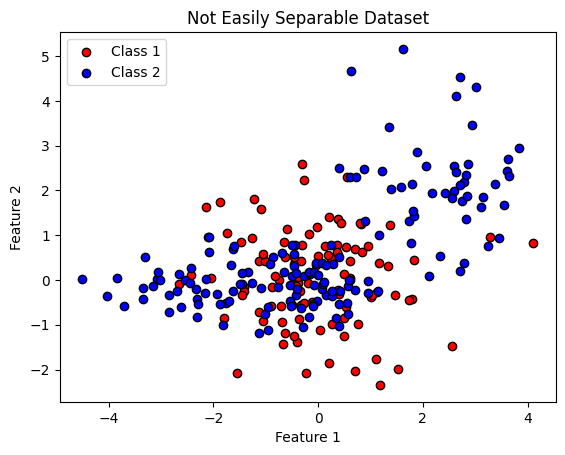

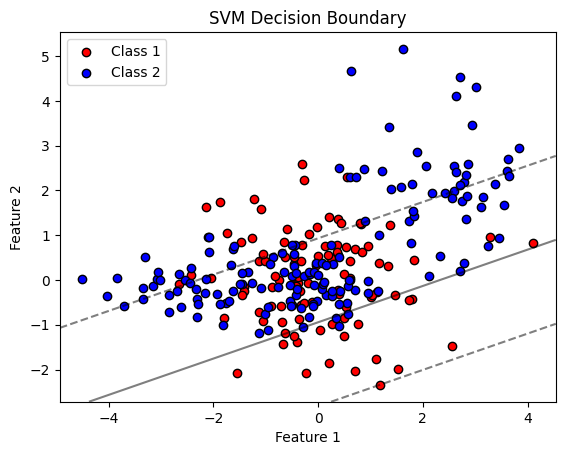

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
np.random.seed(2)
class1 = np.random.randn(100, 2)
class2 = np.concatenate([np.random.randn(50, 1) - 2, np.random.randn(50, 1) * 0.5], axis=1)
class2 = np.concatenate([class2, np.random.randn(50, 2) + 2, np.random.randn(50, 2) * 0.5], axis=0)
plt.scatter(class1[:, 0], class1[:, 1], color='r', label='Class 1', marker='o', edgecolors='k')
plt.scatter(class2[:, 0], class2[:, 1], color='b', label='Class 2', marker='o', edgecolors='k')
plt.title('Not Easily Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
X = np.concatenate([class1, class2])
y = np.concatenate([np.ones(class1.shape[0]), np.ones(class2.shape[0]) * -1])
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X, y)
plt.scatter(class1[:, 0], class1[:, 1], color='r', label='Class 1', marker='o', edgecolors='k')
plt.scatter(class2[:, 0], class2[:, 1], color='b', label='Class 2', marker='o', edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_classifier.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
